In [1]:
import os
import random
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from skimage.io import imread

np.set_printoptions(precision = 2)
np.set_printoptions(suppress  = True)

In [2]:
def normalize(img):
    img_cop  = img.copy()
    img_cop  = img_cop.astype('float64') 
    img_min  = np.min(img_cop)
    img_max  = np.max(img_cop)
    img_cop  = (img_cop - img_min)/(img_max - img_min)
    return img_cop

def load(filename):
    # Get global dictionary
    glob = globals()
    with open(filename, 'rb') as f:
        for k, v in pickle.load(f).items():
            # Set each global variable to the value from the file
            glob[k] = v

In [5]:
images_path = 'images/'

In [7]:
model = tf.keras.models.load_model('model_segmentation')

images_paths = sorted(
    [os.path.join(images_path, fname)
     for fname in os.listdir(images_path)
     if fname.endswith(".png")]
)


b

random.Random(1337).shuffle(images_paths)
test_images_paths = images_paths
img_height    = 256
img_width     = 256
img_channels  = 3

In [8]:
X_test = np.zeros((len(test_images_paths), img_height, img_width, img_channels), dtype= 'uint8')

for i in range(len(test_images_paths)):   
    img = imread(test_images_paths[i])[:,:,:img_channels] 
    img = np.around(255*normalize(img)).astype('uint8')
    X_test[i] = img  #Fill empty X_train with values from img

(54, 256, 256, 3)


In [ ]:
val_samples = 20
Y_test_pred = model.predict(X_test, verbose=1)

2/2 [==============================] - 6s 2s/step


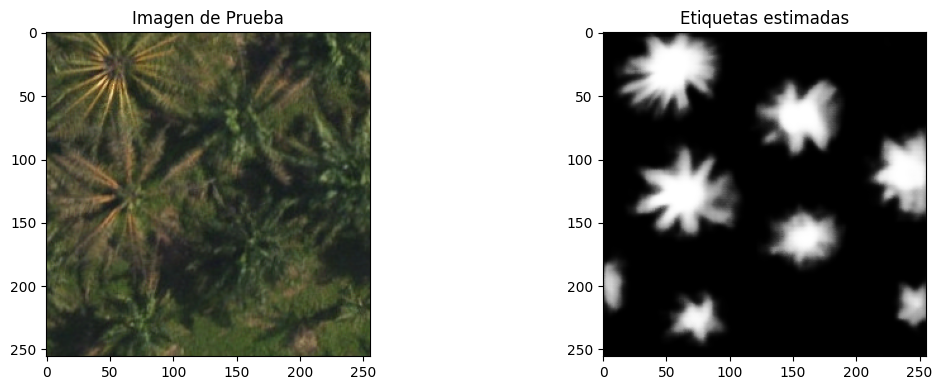

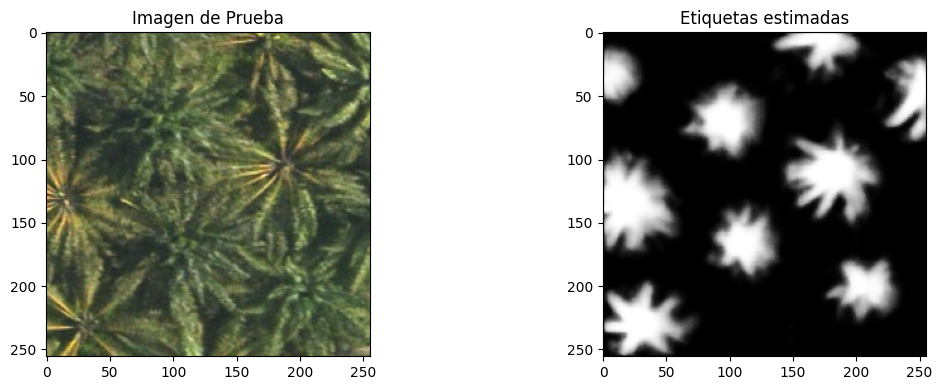

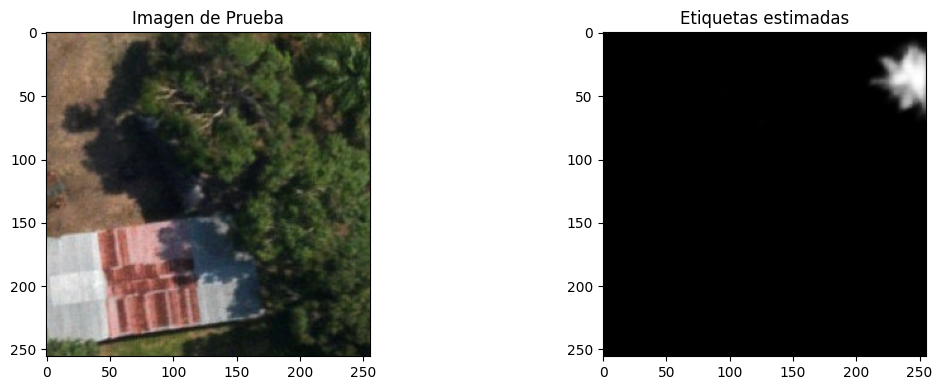

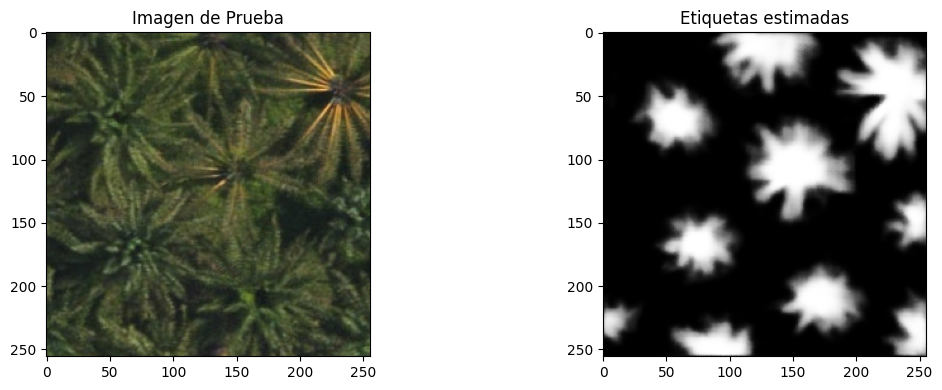

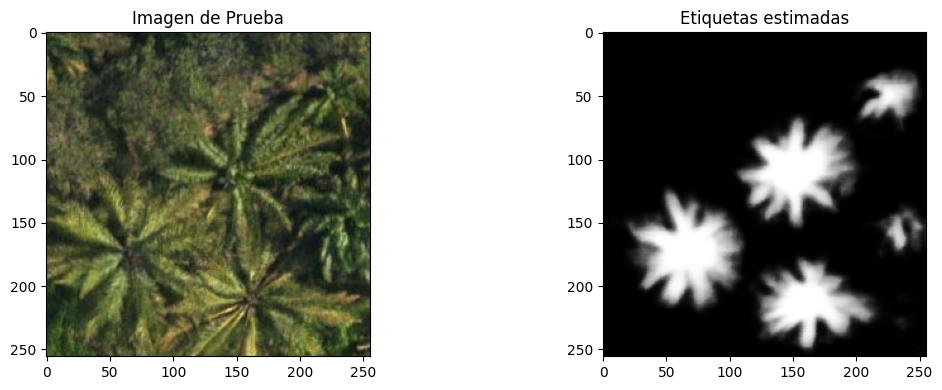

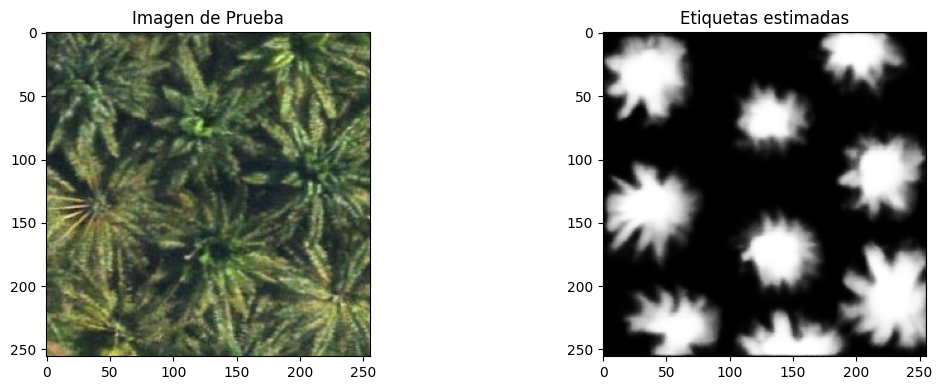

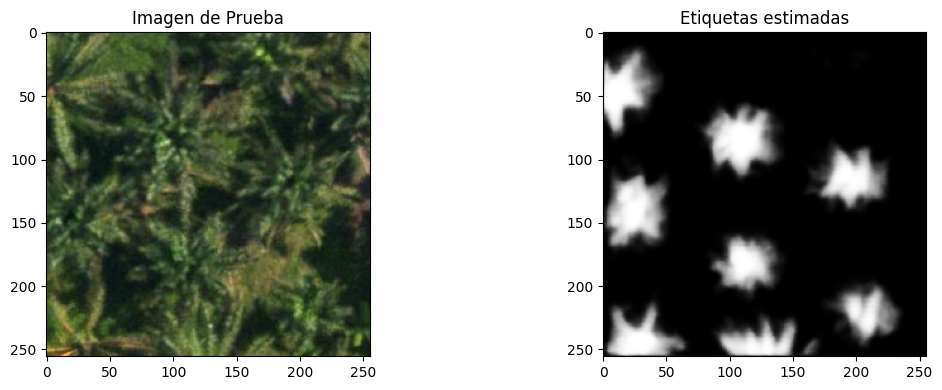

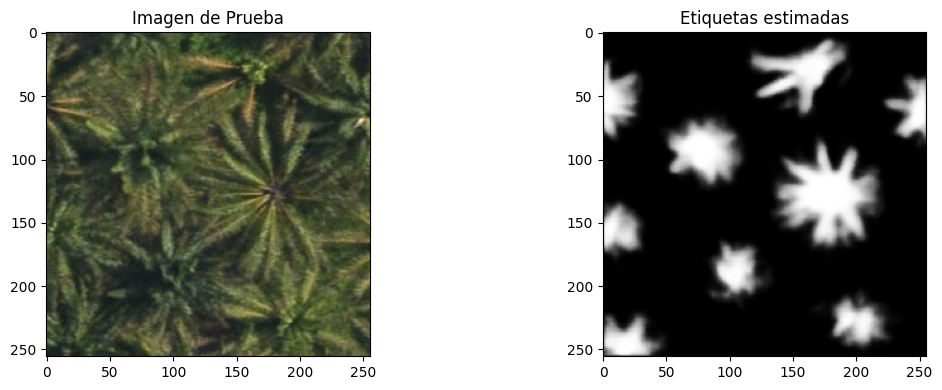

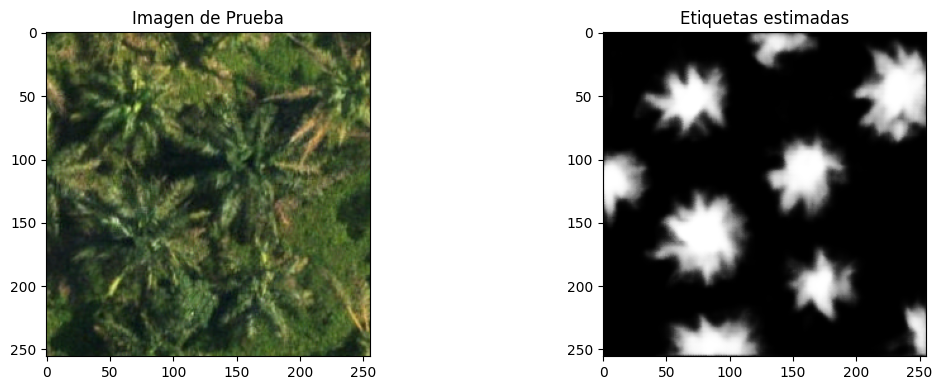

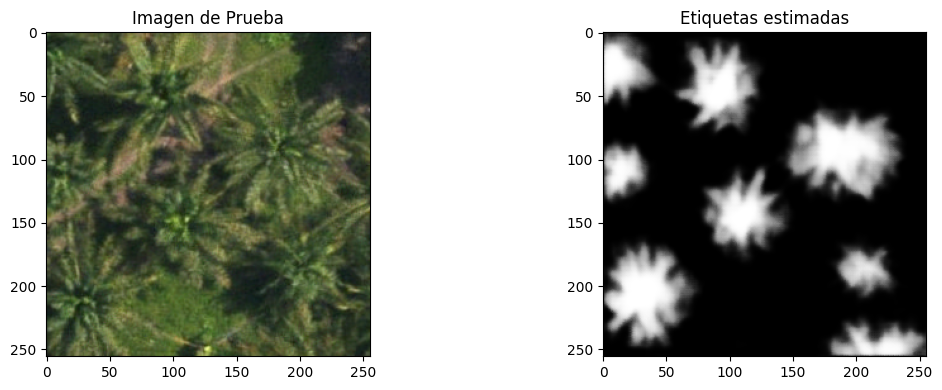

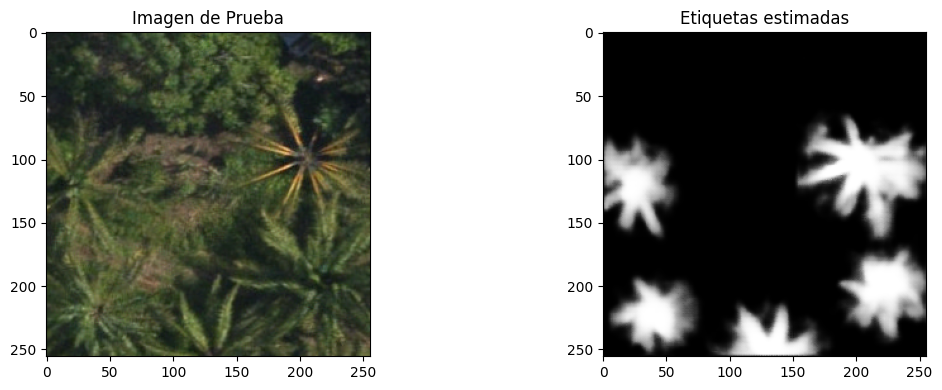

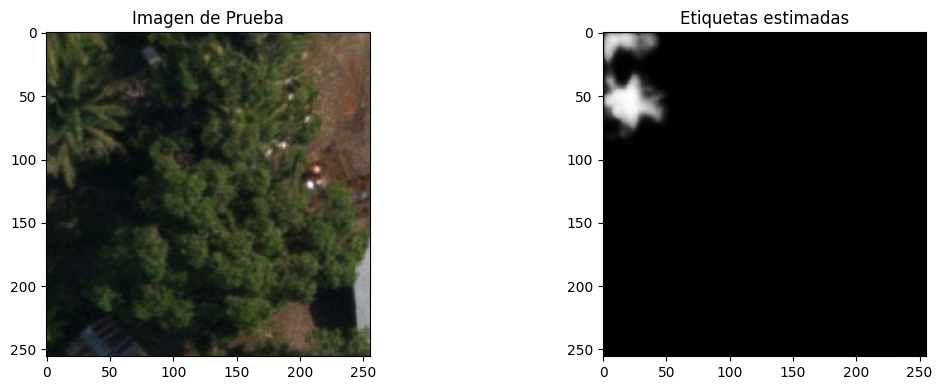

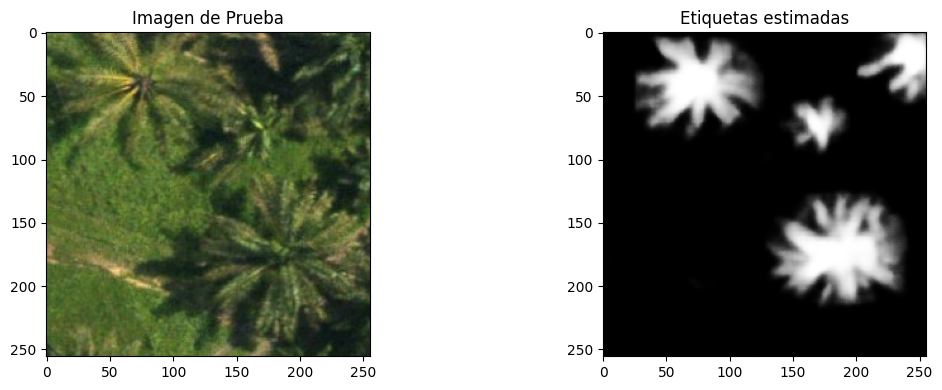

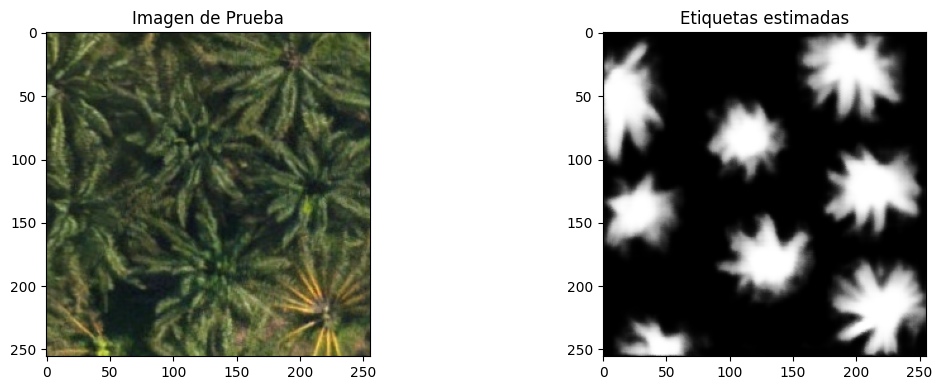

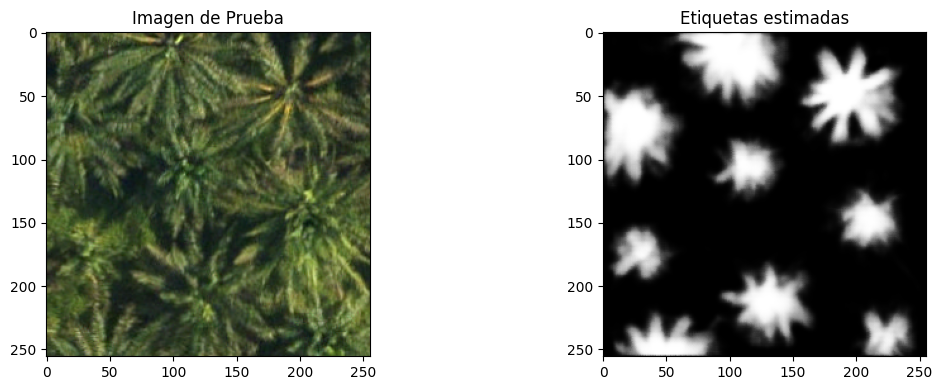

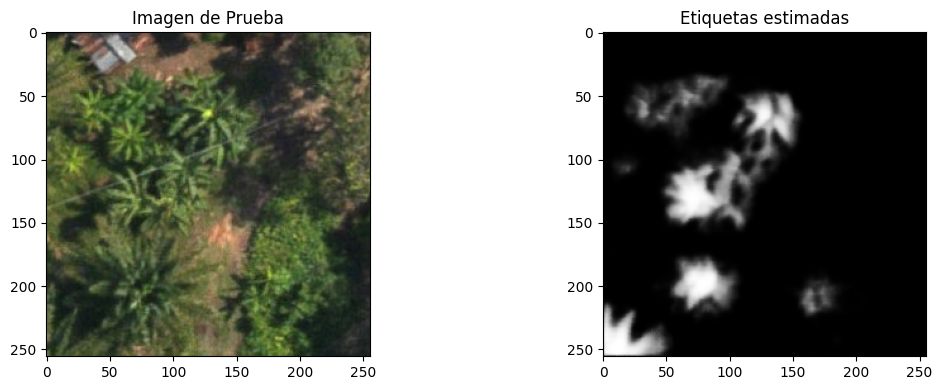

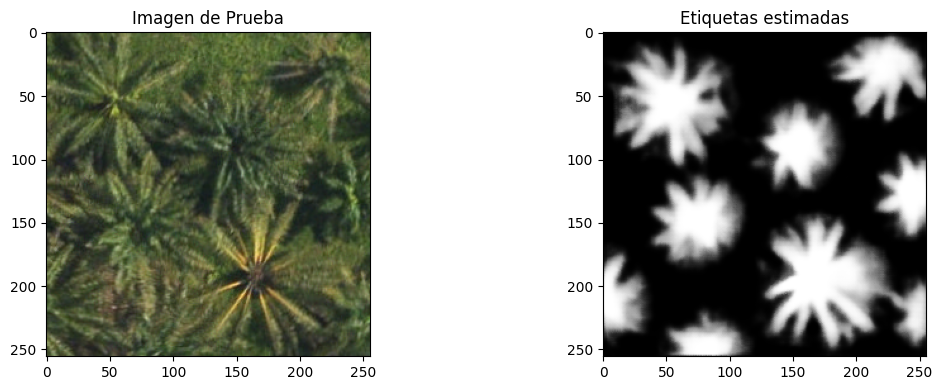

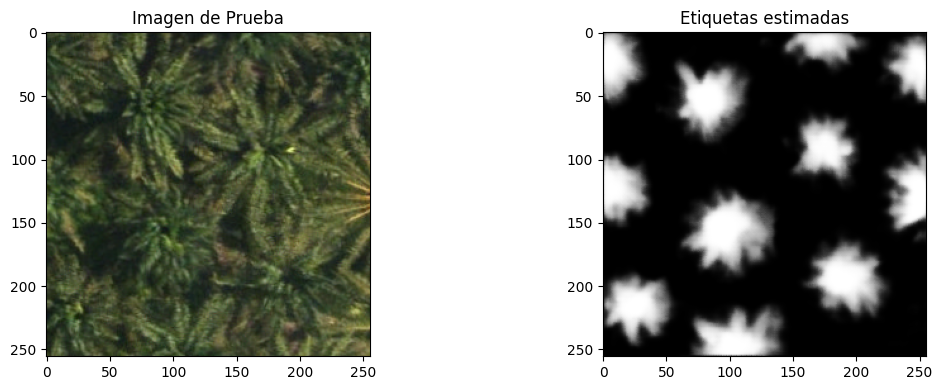

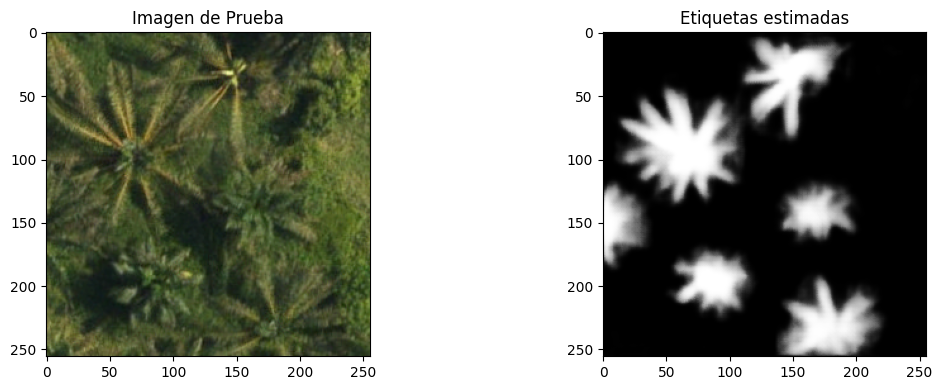

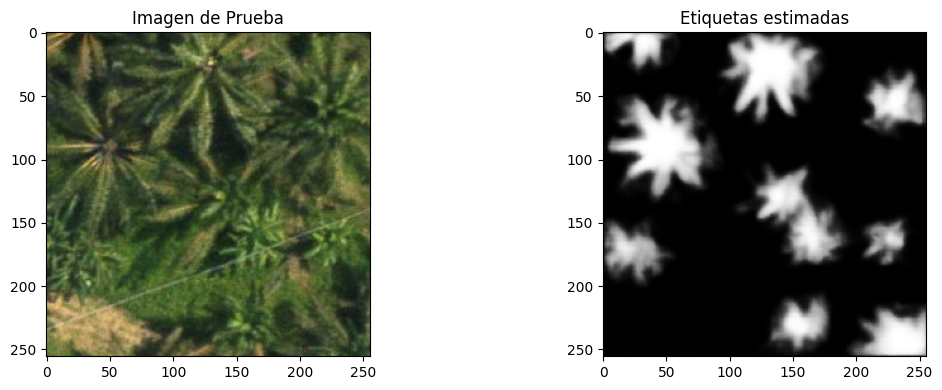

In [11]:
Y_test_diff = np.zeros((val_samples, img_height, img_width, img_channels), dtype= 'uint8')
for i in range(val_samples):
    Y_test_pred[i]   = normalize(Y_test_pred[i])
    Y_test_pred[i] = (Y_test_pred[i]>0.25).astype(np.uint8)

for i in range(val_samples):
    fig, axs = plt.subplots(1,4, figsize = (10,2))
    
    axs[0].imshow(X_test[i],cmap='gray')
    axs[0].set_title('Imagen de Prueba')
    
    axs[1].imshow(Y_test_pred[i], cmap='gray')
    axs[1].set_title('Etiquetas estimadas')
    
    plt.tight_layout()
    plt.show()
    


In [ ]:
plt.imshow(Y_test_pred[0,:,:,0])
plt.colorbar()

In [ ]:
#CC:\Users\Santiago\Desktop\Segmentation with U-net\resultados
#C:\Users\Santiago\Desktop\Nueva carpeta\resultados


val_samples = 56

Y_test_pred = model.predict(X_test, verbose=1)

#plt.imshow(Y_test_pred[0,:,:,0])
#plt.colorbar()

Y_test_diff = np.zeros((val_samples, img_height, img_width, img_channels), dtype= 'uint8')
for i in range(val_samples):
    Y_test_pred[i]   = normalize(Y_test_pred[i])
    Y_test_pred[i] = (Y_test_pred[i]>0.25).astype(np.uint8)

for i in range(val_samples):
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    
    axs[0].imshow(X_test[i],cmap='gray')
    axs[0].set_title('Imagen de Prueba')
    
    axs[1].imshow(Y_test_pred[i], cmap='gray')
    axs[1].set_title('Etiquetas estimadas')
    
    plt.tight_layout()
   # plt.show()
    plt.imsave("/Users/Santiago/Desktop/Nueva carpeta/resultados/"+str(i)+".bmp", Y_test_pred[i,:,:,0], cmap = 'jet')
    plt.imsave("/Users/Santiago/Desktop/Nueva carpeta/resultados/img_"+str(i)+".bmp", X_test[i])

In [ ]:
for i in range(val_samples):
    Y_val  = Y_test[i]
    Y_pred = Y_test_pred[i]
    FP = len(np.where(Y_pred - Y_val  == 1)[0])/len(np.where(Y_val  == 0)[0]) 
    FN = len(np.where(Y_pred - Y_val  == -1)[0])/len(np.where(Y_val  == 1)[0])
    TP = len(np.where(Y_pred + Y_val  == 2)[0])/len(np.where(Y_val  == 1)[0])
    TN = len(np.where(Y_pred + Y_val  == 0)[0])/len(np.where(Y_val  == 0)[0]) 
    Cmat = np.array([[TP, FN], [FP, TN]])*100
    print(Cmat)
    print('\n')